# The prediction about None-Bayes SegNet with MaSTr1325

## Training Loss in 200 epochs
![avater](result/training/loss_segnet_1_MaSTr1325_200.jpg)

## Validation Metrics
|Metrics|Formula|Hint|
|:--|:--|:--|
|$\text{IOU}$          |$=\frac{\text{TP}}{\text{TP}+\text{FP}+\text{FN}}$|Area of Intersection / Area of Union|
|$\text{Dice-Sørensen}$|$=\frac{2\cdot\text{TP}}{\text{TP}+\text{FP}+\text{FN}}$| |
|$\text{Precision}$    |$=\frac{\text{TP}}{\text{TP}+\text{FP}}$|*Symbol*: $\text{Pr}$|
|$\text{Recall}$    |$=\frac{\text{TP}}{\text{TP}+\text{FN}}$|*Symbol*: $\text{Re}$|
|$\text{F1}$    |$=\frac{2\cdot\text{Pr}\cdot\text{Re}}{\text{Pr}+\text{Re}}$|Harmonic Mean of Precision and Recall|


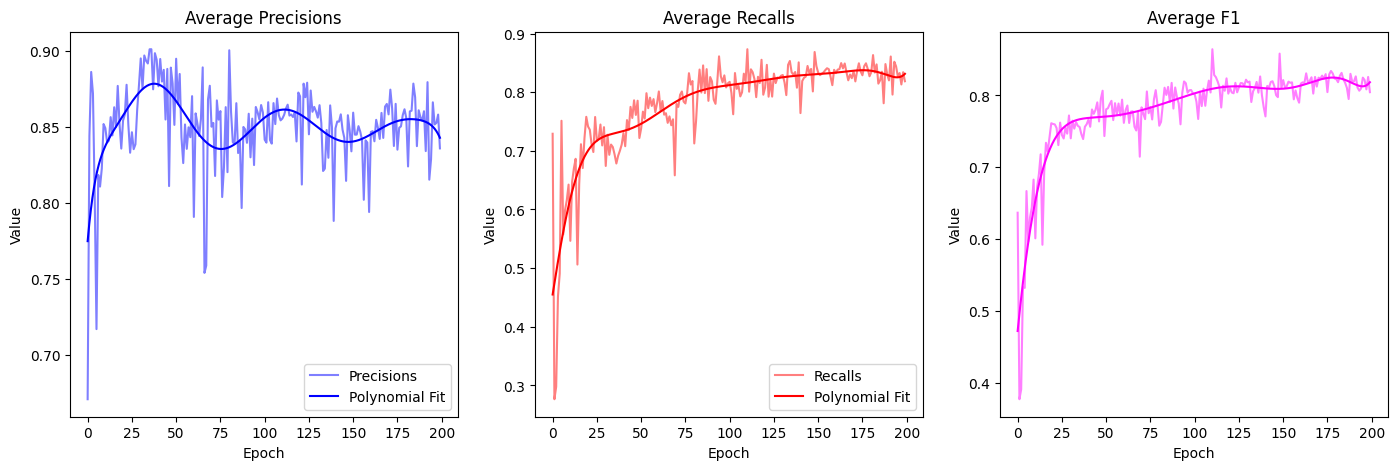

In [22]:
import json
import numpy as np
import matplotlib.pyplot as plt

def evaluation_show(data):
        aver_iou = np.array([item['aver_iou'] for item in data])
        aver_dice = np.array([item['aver_dice'] for item in data])
        Prs = np.array([item['Prs'] for item in data])
        Res = np.array([item['Res'] for item in data])
        F1 = np.array([item['F1'] for item in data])
        
        # Polynomial Smoothing
        x = np.arange(len(data))
        Prs_sm = np.poly1d(np.polyfit(x, Prs, 10))
        Res_sm = np.poly1d(np.polyfit(x, Res, 10))
        F1_sm = np.poly1d(np.polyfit(x, F1, 10))
        x_sm = np.linspace(x.min(), x.max(), 10*len(data))
        Prs_sm = Prs_sm(x_sm)
        Res_sm = Res_sm(x_sm)
        F1_sm = F1_sm(x_sm)

        # # Plot figure 1 for iou and dice
        # plt.figure(figsize=(10, 5))
        # # plot average iou
        # plt.subplot(1, 2, 1)
        # plt.plot(aver_iou, label='mean IOU', color='red')
        # plt.xlabel('Epoch')
        # plt.ylabel('Accuracy')
        # plt.title('IOU (Intersection Over Union)')
        # plt.legend()
        # # plot average dice
        # plt.subplot(1, 2, 2)
        # plt.plot(aver_dice, label='mean Dice', color='red')
        # plt.xlabel('Epoch')
        # plt.ylabel('Accuracy')
        # plt.title('Dice-Sørensen Coeffeciency')
        # plt.show()

        # Plot figure 2 for precision / recalls / F1
        plt.figure(figsize=(17, 5))
        # plot average precision
        plt.subplot(1, 3, 1)
        plt.plot(Prs, label='Precisions', color='blue', alpha = 0.5)
        plt.plot(x_sm, Prs_sm, label='Polynomial Fit', color='blue')
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Average Precisions')
        plt.legend()
        # plot average recall
        plt.subplot(1, 3, 2)
        plt.plot(Res, label='Recalls', color='red', alpha = 0.5)
        plt.plot(x_sm, Res_sm, label='Polynomial Fit', color='red')
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Average Recalls')
        plt.legend()
        # plot average F1
        plt.subplot(1, 3, 3)
        plt.plot(F1, label='F1', color='magenta', alpha = 0.5)
        plt.plot(x_sm, F1_sm, label='Polynomial Fit', color='magenta')
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Average F1')
        plt.show()

# with open('result/validation-epoch200.json', 'r') as file:
with open('result/average1.json', 'r') as file:
        data = json.load(file)
evaluation_show(data)


## Testing Result
### MaSTr1325
![avater](./result/testing/MaSTr1325/132.png)
### OASIs
+ Type1 - Image:071
    |Metrics|Epoch 100|Epoch 200|
    |:--|:--|:--|
    |Precision|0.2402725872967869|0.2510848471737849|
    |Recall|0.717945775976719|0.782054212844707|
    |F1|0.30219871737017223|0.3379941605477262|
    
    ![avater](./result/testing/OASIs/type1/071.png)

+ Type2 - Image:015
    |Metrics|Epoch 100|Epoch 200|
    |:--|:--|:--|
    |Precision|0.1775520750265757|0.21077098715666975|
    |Recall|0.7945851619442142|0.759804883666117|
    |F1|0.24948066792854873|0.2843992904669364|

    ![avater](./result/testing/OASIs/type2/015.png)

+ Type3 - Image:054
    |Metrics|Epoch 100|Epoch 200|
    |:--|:--|:--|
    |Precision|0.09218213792682846|0.10099601354514588|
    |Recall|0.9711530240381202|0.9810116576421538|
    |F1|0.16038198087681396|0.17401820042758656|

    ![avater](./result/testing/OASIs/type3/054.png)

In [ ]:
import torch
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import os
from metrics import test_show
from model.segnet import SegNet
from dataset import MaSTr1325Dataset
from dataset import OASIsDataset

x_transforms = transforms.Compose([
    # transforms.Resize((384, 512)),
    transforms.ToTensor(),  # -> [0,1]
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
y_transforms = transforms.Compose([
    # transforms.Resize((384, 512)),
    transforms.ToTensor()])
# Device define
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.empty_cache()

epoch = 100
model = SegNet(3,3).to(device)
model.load_state_dict(torch.load(f'./result/saved_model/segnet_1_MaSTr1325_{epoch}.pth', map_location='cpu'))
model.eval()

test_dataset = OASIsDataset("type1", transform=x_transforms, target_transform=y_transforms)
test_dataloaders = DataLoader(test_dataset, batch_size=1)


with torch.no_grad():
    for pic,_,pic_path,mask_path in test_dataloaders:
        img_number = os.path.basename(mask_path[0])
        img_number = img_number[:-5]
        pic = pic.to(device)
        prediction = model(pic)
        prediction = torch.squeeze(prediction).cpu().numpy()

        dataset="OASIs"
        root = f"../Dataset/{dataset}"
        test_show(root, threshold=0.2, img_number=img_number, prediction=prediction, dataset=dataset)